# Using RandomForest to Predict Survival Rate of Titanic

# (1): Let's start by visualizing the data from train.csv

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('train.csv')

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Check the survival rate

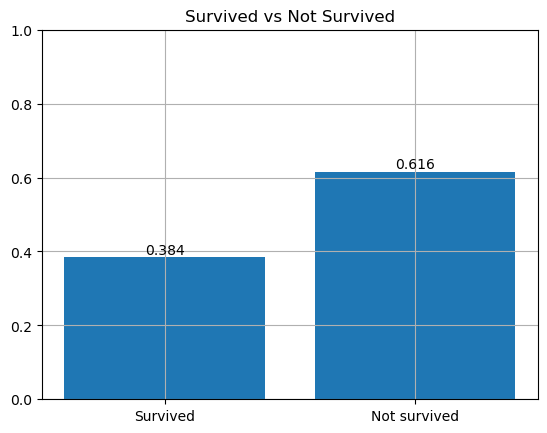

In [37]:
survived_rate = df.iloc[1:]['Survived'].mean()
plt.bar(['Survived', 'Not survived'], [survived_rate, 1-survived_rate])
plt.ylim(0, 1)
plt.title('Survived vs Not Survived')
plt.grid(True)
plt.text(0, survived_rate, f'{survived_rate:.3f}', ha='center', va='bottom')
plt.text(1, 1-survived_rate, f'{1-survived_rate:.3f}', ha='center', va='bottom')
plt.show()

Check the Pclass

In [38]:
df["Pclass"].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [39]:
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

We then check the survival rates of different categories of Pclass

In [40]:
df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Check the mean survival rates of different bins of Age

In [41]:
survival_age = df.groupby(pd.cut(df['Age'], bins=range(0, 100, 5)), observed=True)['Survived'].mean()
survival_age

Age
(0, 5]      0.704545
(5, 10]     0.350000
(10, 15]    0.578947
(15, 20]    0.343750
(20, 25]    0.344262
(25, 30]    0.388889
(30, 35]    0.465909
(35, 40]    0.417910
(40, 45]    0.361702
(45, 50]    0.410256
(50, 55]    0.416667
(55, 60]    0.388889
(60, 65]    0.285714
(65, 70]    0.000000
(70, 75]    0.000000
(75, 80]    1.000000
Name: Survived, dtype: float64

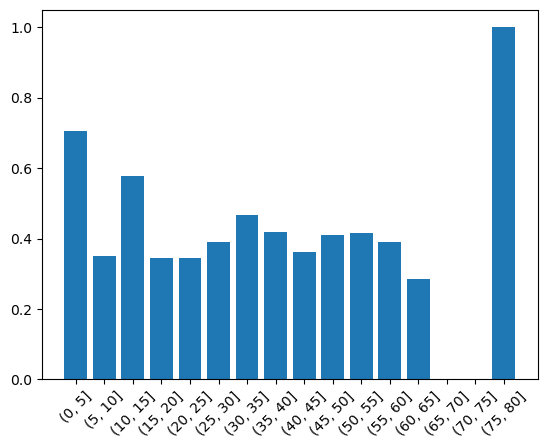

In [42]:
plt.bar(survival_age.index.astype(str), survival_age)
plt.xticks(rotation=45)
plt.show()

The frequency of both sex, and the survival rate

In [43]:
df["Sex"].value_counts(normalize=True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

In [44]:
df.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate for people with how many siblings/spouses

In [45]:
df.groupby("SibSp")["Survived"].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

The survival rate of people with how many parents/children

In [46]:
df.groupby("Parch")["Survived"].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

Distribution of fares

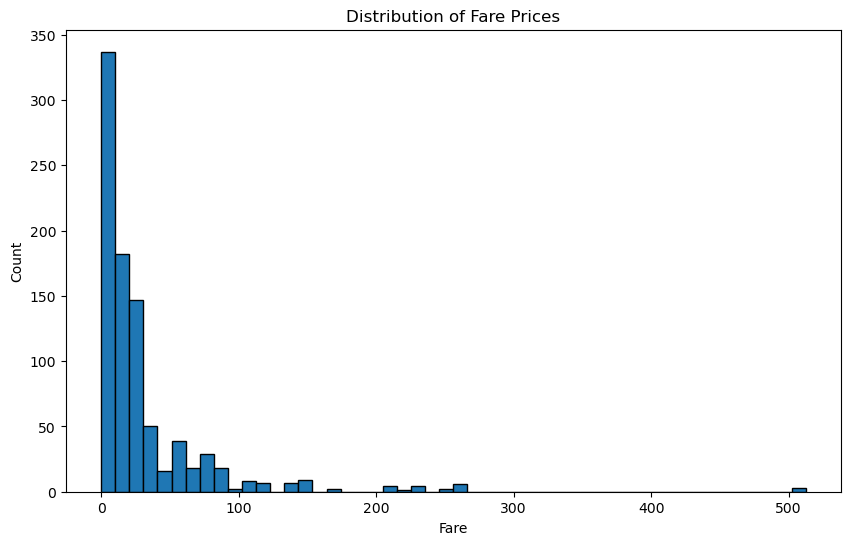

In [47]:
plt.figure(figsize=(10, 6))
plt.hist(df['Fare'], bins=50, edgecolor='black')
plt.title('Distribution of Fare Prices')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

Distribution of fares and survival rates

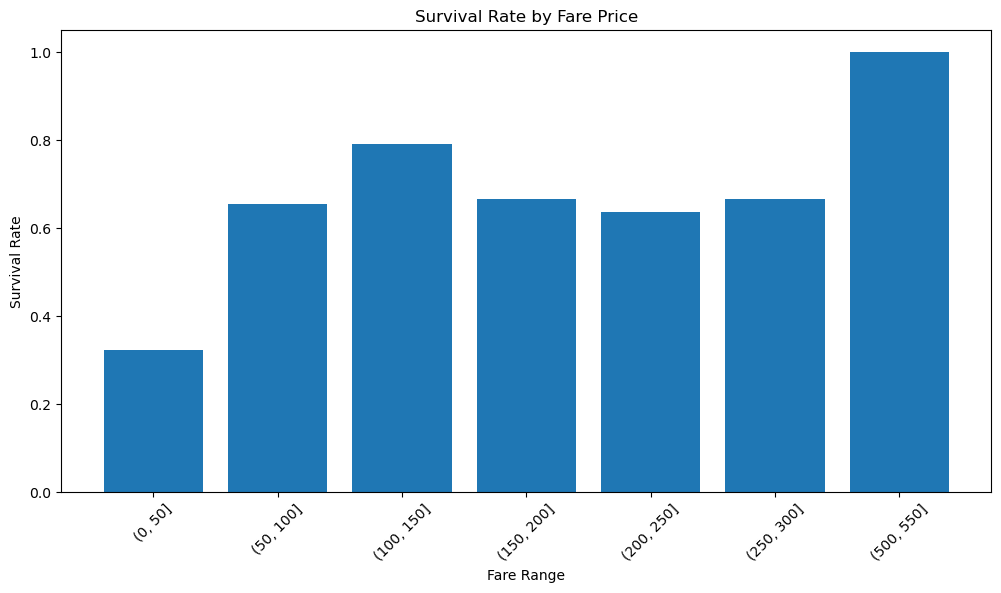

In [48]:
fare_bins = pd.cut(df['Fare'], bins=range(0, int(df['Fare'].max())+50, 50))
survival_by_fare = df.groupby(fare_bins, observed=True)['Survived'].mean()
plt.figure(figsize=(12, 6))
plt.bar(range(len(survival_by_fare)), survival_by_fare)
plt.title('Survival Rate by Fare Price')
plt.xlabel('Fare Range')
plt.ylabel('Survival Rate')
plt.xticks(range(len(survival_by_fare)), survival_by_fare.index.astype(str), rotation=45)
plt.show()

Port of embarkation frequency and survival rate distribution

In [49]:
df["Embarked"].value_counts(normalize=True)

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

In [50]:
df.groupby("Embarked")["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

According to our data visualization, the survival rate of women is significantly higher than that of men, the survival rate of first class is higher than that of first class than that of second class, the survival rate of children is higher than that of other ages, the survival rate of people with 1-2 siblings/spouses is significantly higher than that of others, the survival rate of people with 1-2 parents/children is significantly higher than that of others, and the survival rate of people with tickets above 500 is the highest. Those with fares below 50 have the lowest survival rates, and the port of embarkation in Cherbourg has a significantly higher survival rate than the others.

（2）baseline：logistic regression with basic features-accuracy 0.73

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']
X = train_data[features].copy()
y = train_data['Survived']
X_test = test_data[features].copy()
X['Age'] = X['Age'].fillna(X['Age'].median())
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].median())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].median())
X['Sex'] = X['Sex'].map({'female': 1, 'male': 0})
X_test['Sex'] = X_test['Sex'].map({'female': 1, 'male': 0})
model = LogisticRegression(random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})
submission.to_csv('submission.csv', index=False)
print("Feature Importance:")
for feature, importance in zip(features, abs(model.coef_[0])):
    print(f"{feature}: {importance:.4f}")
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
val_model = LogisticRegression(random_state=42)
val_model.fit(X_train, y_train)
val_score = val_model.score(X_val, y_val)
print(f"\nAccuracy: {val_score:.4f}")

Feature Importance:
Pclass: 1.0515
Sex: 2.6503
Age: 0.0385
Fare: 0.0030
SibSp: 0.3369
Parch: 0.0960

Accuracy: 0.8101


baseline 2: RandomForest with basic features and feature engineering-accuracy 0.74

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']
X = train_data[features].copy()
y = train_data['Survived']
X_test = test_data[features].copy()
X['Age'] = X['Age'].fillna(X['Age'].median())
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].median())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].median())
X['Sex'] = X['Sex'].map({'female': 1, 'male': 0})
X_test['Sex'] = X_test['Sex'].map({'female': 1, 'male': 0})
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})
submission.to_csv('submission.csv', index=False)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
val_model = RandomForestClassifier(n_estimators=100, random_state=42)
val_model.fit(X_train, y_train)
val_score = val_model.score(X_val, y_val)
print(f"\nAccuracy: {val_score:.4f}")


Accuracy: 0.7989


# (2)：Within baseline, We started doing more detailed data preprocessing

In [53]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
df = train_data
df1 = test_data

Check the null values

In [54]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Now check the updated status of all features.

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# (3) Feature Engineering

We try to handel Null values.
fill null values with :

median for numerical feaures
mode for categorical features
Or using linear regression

Next we try to extract all titles in the Name column and check the frequencies.

In [58]:
# Extract title from the Name column
train_titles = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_titles = df1['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
all_titles = pd.concat([train_titles, test_titles]).unique()
# Sort the titles and convert them to a list
titles_list = sorted(list(all_titles))
print("Titles：")
print(titles_list)
# Check the frequency of title

print("\nThe frequency of titles in train.csv：")
print(train_titles.value_counts())
print("\nThe frequency of title in test.csv：")
print(test_titles.value_counts())

Titles：
['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir']

The frequency of titles in train.csv：
Name
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

The frequency of title in test.csv：
Name
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


In [59]:
from sklearn.linear_model import LinearRegression
# First we perform the basic feature transformation
for df2 in [df, df1]:
    # Gender coding and basic characteristics processing
    df2['Sex'] = df2['Sex'].map({'female': 0, 'male': 1})
    df2['Fare'] = df2['Fare'].fillna(df2['Fare'].median())
    df2['Embarked'] = df2['Embarked'].fillna(df2['Embarked'].mode()[0])
    df2['Embarked'] = df2['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    # Title extraction and mapping
    df2['Title'] = df2['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    title_map = {
        'Mr': 1, 'Don': 1,                    # Civilian males
        'Miss': 2, 'Mlle': 2,                 # Unmarried women
        'Mrs': 3, 'Ms': 3, 'Mme': 3,         # Married women
        'Master': 4,                          # Young
        'Countess': 5, 'Lady': 5, 'Dona': 5, # Noble wommen
        'Jonkheer': 6, 'Sir': 6,             # Noble males
        'Dr': 7,                             # Doctors
        'Rev': 8,                            # Priests
        'Col': 9, 'Major': 9, 'Capt': 9      # Specials
    }
    df2['Title'] = df2['Title'].map(title_map)

# Age prediction for the training set and the test set were processed separately by linear regression.
age_features_train = ['Pclass', 'Sex', 'Fare', 'Title', 'Survived', 'SibSp', 'Parch']
known_age_train = df[df['Age'].notna()]
unknown_age_train = df[df['Age'].isna()]
lr_model_train = LinearRegression(positive=True)
lr_model_train.fit(known_age_train[age_features_train], known_age_train['Age'])
predicted_ages_train = lr_model_train.predict(unknown_age_train[age_features_train])
df.loc[df['Age'].isna(), 'Age'] = predicted_ages_train

age_features_test = ['Pclass', 'Sex', 'Fare', 'Title', 'SibSp', 'Parch']
known_age_train = df[df['Age'].notna()] 
lr_model_test = LinearRegression(positive=True)
lr_model_test.fit(known_age_train[age_features_test], known_age_train['Age'])
unknown_age_test = df1[df1['Age'].isna()]
predicted_ages_test = lr_model_test.predict(unknown_age_test[age_features_test])
df1.loc[df1['Age'].isna(), 'Age'] = predicted_ages_test

for df2 in [df, df1]:
    # Deck mapping
    df2['Deck'] = df2['Cabin'].fillna('U').str[0]
    deck_map = {
        'A': 1, 'B': 2, 'C': 3, 'D': 4,
        'E': 5, 'F': 6, 'G': 7, 'T': 8, 'U': 0
    }
    df2['Deck'] = df2['Deck'].map(deck_map)    
    # Using fares to predict Deck
    known_deck = df2[df2['Deck'] != 0]
    lr_deck = LinearRegression()
    lr_deck.fit(known_deck[['Fare', 'Title']], known_deck['Deck'])
    unknown_deck = df2[df2['Deck'] == 0]
    predicted_deck = lr_deck.predict(unknown_deck[['Fare', 'Title']])
    df2.loc[df2['Deck'] == 0, 'Deck'] = np.round(predicted_deck)
    
    # Create composite features
    df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1
    df2['Agebin'] = pd.qcut(df2['Age'], q=5, labels=False)
    df2['Farebin'] = pd.qcut(df2['Fare'], q=5, labels=False)
    df2['IsAlone'] = (df2['FamilySize'] == 1).astype(int)
    df2['PclassSex'] = df2['Pclass'].astype(str) + df2['Sex'].astype(str)
    df2['Fare/FamilySize'] = df2['Fare']/df2['FamilySize']
    df2['Age_Class'] = df2['Age'] * df2['Pclass']
    df2['FreeFare'] = df2['Fare'] == 0
    # PclassSex mapping
    pclass_sex_map = {
        '10': 1, '11': 2,  
        '20': 3, '21': 4, 
        '30': 5, '31': 6  
    }
    df2['PclassSex'] = df2['PclassSex'].map(pclass_sex_map)

# (4): Model prediction and evaluation

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
# Choose the features
features = ['PclassSex', 'Agebin', 'Farebin', 'Embarked', 'FamilySize', 'Deck', 'Title', 'Fare/FamilySize', 'IsAlone', 'FreeFare']

# Since Agebin and Farebin are categorical variables, unique thermal encoding is required
X = pd.get_dummies(df[features])
y = df['Survived']
X_test = pd.get_dummies(df1[features], columns=['Agebin', 'Farebin'])
X_test = X_test.reindex(columns=X.columns, fill_value=0)

# Split train data and test data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=500, random_state=42, min_samples_leaf=5, min_samples_split=5, max_depth=3, max_features='log2')
rf_model.fit(X_train, y_train)
rf_score = rf_model.score(X_val, y_val)
print(f"Random Forest Score: {rf_score:.4f}")

# Cross validation
scores = cross_val_score(rf_model, X, y, cv=5)
print(f"\nRandom Forest Cross Validation Scores:")
print(f"Mean: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Prediction
rf_predictions = rf_model.predict(X_test) 
rf_submission = pd.DataFrame({
    'PassengerId': df1['PassengerId'],
    'Survived': rf_predictions
})
rf_submission.to_csv('rf_titanic.csv', index=False)

Random Forest Score: 0.8209

Random Forest Cross Validation Scores:
Mean: 0.8126 (+/- 0.0160)


In [61]:
# Output detailed categorical reports
y_val_pred = rf_model.predict(X_val)
print("\nReport:")
print(classification_report(y_val, y_val_pred))


Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       157
           1       0.84      0.70      0.76       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



## We found that the recall rate of "1" is low(72%) compared to "0"(89%). Thus, we try to do sampling with SMOTETomek and clean up the sample to remove some of the most likely classes of noise

In [62]:
from imblearn.combine import SMOTETomek
# Using SMOTETomek
smote = SMOTETomek(sampling_strategy=0.6, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# View the category distribution after resampling
print("\nCategory distribution after resampling:")
print(pd.Series(y_train_resampled).value_counts())

# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=500, 
    random_state=42, 
    min_samples_leaf=5, 
    min_samples_split=5, 
    max_depth=3, 
    max_features='log2'
)
rf_model.fit(X_train_resampled, y_train_resampled)

rf_score = rf_model.score(X_val, y_val)
print(f"\nRandom Forest Score on Validation Set: {rf_score:.4f}")

# Output detailed categorical reports
y_val_pred = rf_model.predict(X_val)
print("\nCategorial Report:")
print(classification_report(y_val, y_val_pred))

# Cross validation
scores = cross_val_score(rf_model, X, y, cv=5)
print(f"\nRandom Forest Cross Validation Scores:")
print(f"Mean: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Check the feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))

# Final prediction
rf_predictions = rf_model.predict(X_test)
rf_submission = pd.DataFrame({
    'PassengerId': df1['PassengerId'],
    'Survived': rf_predictions
})
rf_submission.to_csv('rf_prediction_with_SMOTE.csv', index=False)


Category distribution after resampling:
Survived
0    366
1    209
Name: count, dtype: int64

Random Forest Score on Validation Set: 0.8209

Categorial Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.82      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268


Random Forest Cross Validation Scores:
Mean: 0.8126 (+/- 0.0160)

Feature Importance:
           feature  importance
6            Title    0.432442
0        PclassSex    0.279140
7  Fare/FamilySize    0.094661
2          Farebin    0.066581
4       FamilySize    0.051581
5             Deck    0.027552
1           Agebin    0.023198
3         Embarked    0.012779
8          IsAlone    0.011748
9         FreeFare    0.000317
